In [1]:
using Gadfly

INFO: Precompiling module Gadfly.


In [2]:
using CSV
data = CSV.read("CCPP/Folds5x2_pp.csv", delim=';', decimal=',', quotechar='"')

INFO: Precompiling module CSV.


,AT,V,AP,RH,PE
1,8.34,40.77,1010.84,90.01,480.48
2,23.64,58.49,1011.4,74.2,445.75
3,29.74,56.9,1007.15,41.91,438.76
4,19.07,49.69,1007.22,76.79,453.09
5,11.8,40.66,1017.13,97.2,464.43
6,13.97,39.16,1016.05,84.6,470.96
7,22.1,71.29,1008.2,75.38,442.35
8,14.47,41.76,1021.98,78.41,464.0
9,31.25,69.51,1010.25,36.83,428.77
10,6.77,38.18,1017.8,81.13,484.31


# Linear Regression Algorithm

Hypothesis: $h_\theta{}(x) = \theta{}_0 + \theta{}_1 * x$

Parameters: $\theta{}_0, \theta{}_1$

Cost Function: $J(\theta{}_0, \theta{}_1) = \dfrac{1}{2m} \sum_{i=1}^m (h_\theta{}(x^{(i)}) - y^{(i)})^2$

Goal: $\min\limits_{\theta{}_0, \theta{}_1} J(\theta{}_0, \theta{}_1)$

## Gradient Descent

- Start with some $\theta{}_0, \theta{}_1$, (0, 0) for example
- Keep changing $\theta{}_0, \theta{}_1$ to reduce $J(\theta{}_0, \theta{}_1)$ until we hopefully end up at a minimum
- Gradient Descent is more general, it can be applied to a function with even more than two variables


### Gradient Descent Algorithm

repeat until convergence:

$\theta{}_j := \theta{}_j - \alpha{} \dfrac{\partial}{\partial{}\theta{}_j}J(\theta{}_0, \theta{}_1)$

- $\alpha$ is a learning rate, it controls how big a step is taken downhill through gradient descent
- simultaneously update $\theta{}_0$ and $\theta{}_1$:
    - $temp0 := \theta{}_0 - \alpha{} \dfrac{\partial}{\partial{}\theta{}_0}J(\theta{}_0, \theta{}_1)$
    - $temp1 := \theta{}_1 - \alpha{} \dfrac{\partial}{\partial{}\theta{}_1}J(\theta{}_0, \theta{}_1)$
    - $\theta{}_0 := temp0$
    - $\theta{}_1 := temp1$

random training data:

In [3]:
train_x = data[:RH];
train_y = data[:AP];

implementation of linear regression thorugh gradient descent:

In [15]:
θ₀ = 0
θ₁ = 0
α = 0.0001
costθ₁(x, y) = sum(x .* (θ₀ .+ θ₁ .* x .- y)) / length(x)
costθ₀(x, y) = sum(θ₀ .+ θ₁ .* x .- y) / length(x)

costθ₀ (generic function with 1 method)

In [18]:
for _ in 1:2000000
    temp0 = θ₀ - α * costθ₀(train_x, train_y)
    temp1 = θ₁ - α * costθ₁(train_x, train_y)
    # simultaneously update the thetas
    θ₀ = temp0
    θ₁ = temp1
end
h₁(x) = θ₀ + θ₁ * x

h₁ (generic function with 1 method)

In [19]:
θ₀

1009.7986336001654

linear regression direct solver

In [20]:
θ1 = sum((train_x .- mean(train_x)) .* (train_y .- mean(train_y))) / sum((train_x .- mean(train_x)).^2)
θ0 = mean(train_y) - θ1 * mean(train_x)
h(x)= θ0 + θ1 * x

h (generic function with 1 method)

In [21]:
θ0

1010.2898665619017

In [ ]:
plot(layer(x=train_x, y=train_y), layer(h, 0, 100, Theme(default_color=colorant"red")), layer(h₁, 0, 110))

In [22]:
h(125)

1015.352704195722

In [23]:
h₁(125)

1015.6671309056482

Wrapping everything into a single function:

In [24]:
function simple_linear_regression(x, y, α::Float64, iterations::Int)
    θ₀ = 0
    θ₁ = 0
    costθ₁(x, y) = sum(x .* (θ₀ .+ θ₁ .* x .- y)) / length(x)
    costθ₀(x, y) = sum(θ₀ .+ θ₁ .* x .- y) / length(x)
    for _ in 1:iterations
        temp0 = θ₀ - α * costθ₀(x, y)
        temp1 = θ₁ - α * costθ₁(x, y)
        # simultaneously update the thetas
        θ₀ = temp0
        θ₁ = temp1
    end
    return θ₀, θ₁
end

simple_linear_regression (generic function with 1 method)

In [60]:
simple_linear_regression(train_x, train_y, 0.0001, 2000000)

(1009.7984462014163, 0.04695043723024724)

## Multivariate Linear Regression

Hypothesis:
- Previously: $h_\theta{}(x) = \theta{}_0 + \theta{}_1x$
- for multivariable: $h_\theta{}(x) = \theta{}_0 + \theta{}_1x_1 + \theta{}_2x_2 + \theta{}_3x_3 + \ldots{} + \theta{}_nx_n$ and so on
- notation: $x_0 = 1$
    - $x = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots{} \\ x_n \end{bmatrix}$
    - $\theta{} = \begin{bmatrix} \theta{}_0 \\ \theta{}_1 \\ \theta{}_2 \\ \vdots{} \\ \theta{}_n \end{bmatrix}$
    - $h_\theta{}(x) = \theta{}_0x_0 + \theta{}_1x_1 + \theta{}_2x_2 + \theta{}_3x_3 + \ldots{} + \theta{}_nx_n = \theta^T * x$

Cost function:
- $J(\theta) = \dfrac{1}{2m} \sum_{i=1}^m (h_\theta{}(x^{(i)}) - y^{(i)})^2$

### Gradient Descent

$\theta{}_j := \theta{}_j - \alpha{} \dfrac{1}{m}\sum_{i=1}^m (h_\theta{}(x^{(1)}) - y^{(i)}) x_{j}^{(i)}$

In [25]:
multi_train_x = Array(data[1:9500, 1:4]);
multi_train_y = Array(data[1:9500, 5])';

add the zero feature to our training data containing only the number 1

In [27]:
multi_train_x = hcat(ones(size(multi_train_x)[1]), multi_train_x)

9500×5 Array{Union{Float64, Missings.Missing},2}:
 1.0   8.34  40.77  1010.84  90.01
 1.0  23.64  58.49  1011.4   74.2 
 1.0  29.74  56.9   1007.15  41.91
 1.0  19.07  49.69  1007.22  76.79
 1.0  11.8   40.66  1017.13  97.2 
 1.0  13.97  39.16  1016.05  84.6 
 1.0  22.1   71.29  1008.2   75.38
 1.0  14.47  41.76  1021.98  78.41
 1.0  31.25  69.51  1010.25  36.83
 1.0   6.77  38.18  1017.8   81.13
 1.0  28.28  68.67  1006.36  69.9 
 1.0  22.99  46.93  1014.15  49.42
 1.0  29.3   70.04  1010.95  61.23
 ⋮                                
 1.0  19.05  59.21  1017.99  89.53
 1.0  23.34  45.61  1012.73  74.09
 1.0  32.69  72.86  1003.57  56.84
 1.0   8.73  36.18  1013.66  77.74
 1.0  10.41  44.68  1023.53  91.38
 1.0  22.28  58.12  1014.54  83.27
 1.0  25.14  60.93  1007.44  76.71
 1.0  18.26  61.27  1019.1   74.74
 1.0  23.74  63.9   1014.73  81.9 
 1.0  31.46  70.79  1003.54  59.51
 1.0  31.68  70.79  1004.05  54.5 
 1.0  26.62  72.43  1006.79  82.74

In [28]:
multiα = 0.000001;

multivariate and vectorized version of our partial derivative of the cost function J

In [29]:
costθ(x, y) = (1/size(x)[1]) * sum(((θ' * x') - multi_train_y) * multi_train_x)

costθ (generic function with 1 method)

Iteration step for finding a converging minimum for our coefficients

In [30]:
θ = zeros(size(multi_train_x)[2])
for _ in 1:100000
    θ = θ - multiα * costθ(multi_train_x, multi_train_y)
end

In [31]:
θ

5-element Array{Float64,1}:
 0.390951
 0.390951
 0.390951
 0.390951
 0.390951

In [32]:
hmulti(x) = θ' * x'

hmulti (generic function with 1 method)

In [33]:
test_x = Array(data[9502:end, 1:4])
test_x = hcat(ones(size(test_x)[1]), test_x)
test_y = Array(data[9502:end, 5]);

In [34]:
hmulti(test_x)

1×67 RowVector{Union{Float64, Missings.Missing},ConjArray{Union{Float64, Missings.Missing},1,Array{Union{Float64, Missings.Missing},1}}}:
 455.326  456.604  451.772  453.641  …  462.253  450.841  465.916  453.144

Wrapping everything into a single multivariate linear regression function

In [37]:
function multi_linear_regression(X, y, α, iterations)
    # add the zero feature
    X_train = hcat(ones(size(X)[1]), X)
    costθ(x₁, y₁, θ₁) = (1/size(x₁)[1]) * sum(((θ₁' * x₁') - y₁) * x₁)
    Jθ(x₁, y₁, θ₁) = (1/(2*size(x₁)[1])) * sum(((θ₁' * x₁') - y₁).^2)
    θ = zeros(size(X_train)[2])
    total_cost = [Jθ(X_train, y, θ)]
    for _ in 1:iterations
        total_cost = hcat(total_cost, Jθ(X_train, y, θ))
        θ = θ - α * costθ(X_train, y, θ)
    end
    return θ, total_cost
end

multi_linear_regression (generic function with 1 method)

In [252]:
_, total_cost = multi_linear_regression(Array(data[1:9500, 1:4]), Array(data[1:9500, 5])', 0.000001, 100000)

([0.390951, 0.390951, 0.390951, 0.390951, 0.390951], [2.06721e5 2.06721e5 … 462.455 462.455])

## Feature Scaling

Make sure features are on a similar scale:
- $x_1$ = size(0-2000 feet^2)
- $x_2$ = number of bedrooms (1-5)
- => This leads to a strong oscillation of our gradient descent function and thus it may take a longer time to find a minimum because of this
- Goal: get every feature into approximately a $-1 \leq x_i \leq 1$ range
- A simple method is to divide by the largest value in the dataset

### Mean normalization

Replace $x_i$ with $x_i - \mu_i$ to make features have approximately zero mean:

- $x_1 \leftarrow \dfrac{x_1 - \mu_1}{s_1}$, where $\mu_1$ is average value of $x_1$ in training set, $s_1$ is (max - min) or standard deviation

In [38]:
multi_train_x = Array(data[1:9500, 1:4]);
multi_train_y = Array(data[1:9500, 5])';

In [39]:
test_x = Array(data[9502:end, 1:4])
test_y = Array(data[9502:end, 5]);

In [40]:
μfunc(x) = mean(x, 1)

μfunc (generic function with 1 method)

In [41]:
scale(x) = (x .- μfunc(x)) ./ std(x, 1)

scale (generic function with 1 method)

In [42]:
scaled_train_x = scale(multi_train_x);

In [43]:
newθ, _ = multi_linear_regression(scaled_train_x, multi_train_y, 0.01, 100000);

In [44]:
newθ

5-element Array{Float64,1}:
 131.644
 131.644
 131.644
 131.644
 131.644

In [45]:
function predict(x, θ)
    scaled_test = scale(x)
    # add feature zero
    scaled_test = hcat(ones(size(scaled_test)[1]), scaled_test)
    return θ' * scaled_test'
end

predict (generic function with 1 method)

In [46]:
predict(test_x, newθ)

1×67 RowVector{Float64,Array{Float64,1}}:
 284.479  281.132  104.507  194.338  …  459.721  26.5536  482.24  130.243

## Learning Rate

For choosing the learning rate $\alpha$ it is best to look at the plot of our cost function $J(\theta)$ to the number of iterations

In [47]:
_, scaled_cost = multi_linear_regression(scaled_train_x, multi_train_y, 0.001, 1000);

A normal, converging regression should have a plot, which decreases over time

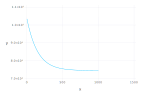

In [48]:
plot(x=1:size(scaled_cost)[2], y=scaled_cost, Geom.line)

- If the graph increases or oscillates you should choose a smaller value for $\alpha$.
- If $\alpha$ is too small, gradient descent can be slow to converge
- To choose $\alpha$, try:
    - 0.001
    - 0.003
    - 0.01
    - 0.03
    - 0.1
    - 0.3
    - 1
- increase by 3 times each

## Features and Polynomial Regression

- You can combine two features into one. If width an depth are two seperate features of a dataset, depending on the context you could make one feature - the area - out of both.
- Again depending on your dataset, it may be better to fit a polynomial regression algorithm, where you have a quadratic function for example: $h_\theta(x) = \theta_0 + \theta_1(feature) + \theta_2(feature)^2$